<a href="https://colab.research.google.com/github/Emily-KD/DS200/blob/main/chpt12_Comparing_Two_Samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
from datascience import *
path_data = 'http://personal.psu.edu/drh20/200DS/assets/data/'
%matplotlib inline
import matplotlib.pyplot as plots
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import scipy.stats as stats
plots.style.use('fivethirtyeight')

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


#chpt 12. Comparing Two Samples
We have seen several examples of assessing whether a single sample looks like random draws from a specified chance model. 
- Did the Alameda County jury panels look like a random sample from the population of eligible jurors?
- Did the pea plants that Mendel grew have colors that were consistent with the chances he specified in his model?

In all of these cases there was just one random sample, and we were trying to decide how it had been generated. But often, data scientists have to compare two random samples with each other. For example, they might have to compare the outcomes of patients who have been assigned at random to a treatment group and a control group. Or they might have randomized internet users to receive two different versions of a website, after which they would want to compare the actions of the two random groups.

In this chapter, we develop a way of using Python to compare two random samples and answer questions about the similarities and differences between them. You will see that the methods we develop have diverse applications. Our examples are from medicine and public health as well as football!


##12.1. A/B Testing
In modern data analytics, deciding whether two numerical samples come from the same underlying distribution is called *A/B testing*. The name refers to the labels of the two samples, A and B.

We will develop the method in the context of an example. The data come from a sample of newborns in a large hospital system. We will treat it as if it were a simple random sample though the sampling was done in multiple stages. [Stat Labs](https://www.stat.berkeley.edu/~statlabs/) by Deborah Nolan and Terry Speed has details about a larger dataset from which this set is drawn. 

### 12.1.1. Smokers and Nonsmokers
The table `births` contains the following variables for 1,174 mother-baby pairs: the baby's birth weight in ounces, the number of gestational days, the mother's age in completed years, the mother's height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy.

In [ ]:
births = Table.read_table(path_data + 'baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


One of the aims of the study was to see whether maternal smoking was associated with birth weight. Let's see what we can say about the two variables.

We'll start by selecting just `Birth Weight` and `Maternal Smoker`. There are 715 non-smokers among the women in the sample, and 459 smokers.

In [ ]:
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')

In [ ]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


In [ ]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [ ]:
births.group('Maternal Smoker', np.average)

Maternal Smoker,Birth Weight average,Gestational Days average,Maternal Age average,Maternal Height average,Maternal Pregnancy Weight average
False,123.085,279.874,27.5441,64.014,129.48
True,113.819,277.898,26.7364,64.1046,126.919


Let's look at the distribution of the birth weights of the babies of the non-smoking mothers compared to those of the smoking mothers. To generate two overlaid histograms, we will use `hist` with the optional `group` argument which is a column label or index. The rows of the table are first grouped by this column and then a histogram is drawn for each one.

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:483: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to

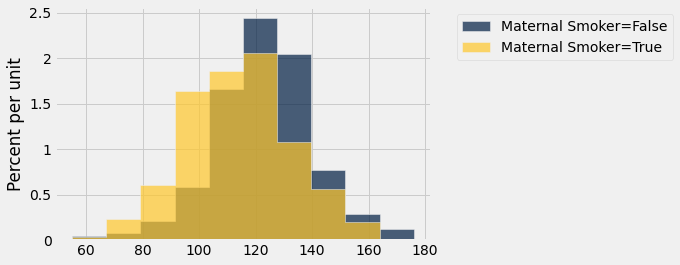

In [ ]:
smoking_and_birthweight.hist('Birth Weight', group = 'Maternal Smoker')

The distribution of the weights of the babies born to mothers who smoked appears to be based slightly to the left of the distribution corresponding to non-smoking mothers. The weights of the babies of the mothers who smoked seem lower on average than the weights of the babies of the non-smokers. 

This raises the question of whether the difference reflects just chance variation or a difference in the distributions in the larger population. Could it be that there is no difference between the two distributions in the population, but we are seeing a difference in the samples just because of the mothers who happened to be selected?

### 12.1.2. The Hypotheses
We can try to answer this question by a test of hypotheses. The chance model that we will test says that there is no underlying difference in the populations; the distributions in the samples are different just due to chance. 

Formally, this is the null hypothesis. We are going to have to figure out how to simulate a useful statistic under this hypothesis. But as a start, let's just state the two natural hypotheses.

**Null hypothesis:** In the population, the distribution of birth weights of babies is the same for mothers who don't smoke as for mothers who do. The difference in the sample is due to chance.

**Alternative hypothesis:** In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers.

### 12.1.3. Test Statistic
The alternative hypothesis compares the average birth weights of the two groups and says that the average for the mothers who smoke is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic. 

We will do the subtraction in the order "average weight of the smoking group $-$ average weight of the non-smoking group". Small values (that is, large negative values) of this statistic will favor the alternative hypothesis. 

The observed value of the test statistic is about $-9.27$ ounces.

In [ ]:
means_table = births.group('Maternal Smoker', np.average)
means_table

Maternal Smoker,Birth Weight average,Gestational Days average,Maternal Age average,Maternal Height average,Maternal Pregnancy Weight average
False,123.085,279.874,27.5441,64.014,129.48
True,113.819,277.898,26.7364,64.1046,126.919


In [ ]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

-9.266142572024918

We are going compute such differences repeatedly in our simulations below, so we will define a function to do the job. The function takes two arguments:

- the name of the table of data
- the label of the column that contains the Boolean variable for grouping

It returns the difference between the means of the `True` group and the `False` group.

You will soon see why we are specifying the two arguments. For now, just check that the function returns what it should.

In [ ]:
def difference_of_means(table, group_label):
    """Takes: name of table,
    column label that indicates the group to which the row belongs
    Returns: Difference of mean birth weights of the two groups"""
    reduced = table.select('Birth Weight', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

To check that the function is working, let's use it to calculate the observed difference between the mean birth weights of the two groups in the sample.

In [ ]:
difference_of_means(births, 'Maternal Smoker')

-9.266142572024918

That's the same as the value of `observed_difference` calculated earlier.

### 12.1.4. Predicting the Statistic Under the Null Hypothesis

To see how the statistic should vary under the null hypothesis, we have to figure out how to simulate the statistic under that hypothesis. A clever method based on *random permutations* does just that.

If there were no difference between the two distributions in the underlying population, then whether a birth weight has the label `True` or `False` with respect to maternal smoking should make no difference to the average. The idea, then, is to shuffle all the labels randomly among the mothers. This is called *random permutation*. 

Shuffling ensures that the count of `True` labels does not change, and nor does the count of `False` labels. This is important for the comparability of the simulated differences of means and the original difference of means. We will see later in the course that the sample size affects the variability of a sample mean.

Take the difference of the two new group means: the mean weight of the babies whose mothers have been randomly labeled smokers and the mean weight of the babies of the remaining mothers who have all been randomly labeled non-smokers. This is a simulated value of the test statistic under the null hypothesis.

Let's see how to do this. It's always a good idea to start with the data. We have reduced the table to have just the columns that we need.

In [ ]:
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


There are 1,174 rows in the table. To shuffle all the labels, we will draw a random sample of 1,174 rows without replacement. Then the sample will include all the rows of the table, in random order. 

We can use the Table method `sample` with the optional `with_replacement=False` argument. We don't have to specify a sample size, because by default, `sample` draws as many times as there are rows in the table.

In [ ]:
shuffled_labels = smoking_and_birthweight.sample(with_replacement = False).column(0)
original_and_shuffled = smoking_and_birthweight.with_column('Shuffled Label', shuffled_labels)

In [ ]:
original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Label
False,120,True
False,113,False
True,128,False
True,108,True
False,136,False
False,138,True
False,132,True
False,120,False
True,143,False
False,140,True


Each baby's mother now has a random smoker/non-smoker label in the column `Shuffled Label`, while her original label is in `Maternal Smoker`. If the null hypothesis is true, all the random re-arrangements of the labels should be equally likely.

Let's see how different the average weights are in the two randomly labeled groups.

In [ ]:
shuffled_only = original_and_shuffled.select('Birth Weight','Shuffled Label')
shuffled_group_means = shuffled_only.group('Shuffled Label', np.average)
shuffled_group_means

Shuffled Label,Birth Weight average
False,119.014
True,120.161


The averages of the two randomly selected groups are quite a bit closer than the averages of the two original groups. We can use our function `difference_of_means` to find the two differences.

In [ ]:
difference_of_means(original_and_shuffled, 'Shuffled Label')

1.1472340295869685

In [ ]:
difference_of_means(original_and_shuffled, 'Maternal Smoker')

-9.266142572024918

But could a different shuffle have resulted in a larger difference between the group averages? To get a sense of the variability, we must simulate the difference many times. 

As always, we will start by defining a function that simulates one value of the test statistic under the null hypothesis. This is just a matter of collecting the code that we wrote above. 

The function is called `one_simulated_difference_of_means`. It takes no arguments, and returns the difference between the mean birth weights of two groups formed by randomly shuffling all the labels.

In [ ]:
def one_simulated_difference_of_means():
    """Returns: Difference between mean birthweights
    of babies of smokers and non-smokers after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = births.sample(with_replacement=False).column('Maternal Smoker')
    
    # table of birth weights and shuffled labels
    shuffled_table = births.select('Birth Weight').with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, 'Shuffled Label')   

Run the cell below a few times to see how the output changes.

In [ ]:
one_simulated_difference_of_means()

-1.0563523622347049

### 12.1.5. Permutation Test
Tests based on random permutations of the data are called *permutation tests*. We are performing one in this example. In the cell below, we will simulate our test statistic – the difference between the average birth weight of the two randomly formed groups – many times and collect the differences in an array. 

In [ ]:
differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    differences = np.append(differences, new_difference)                               

The array `differences` contains 5,000 simulated values of our test statistic: the difference between the mean weight in the smoking group and the mean weight in the non-smoking group, when the labels have been assigned at random. 

###12.1.6. Conclusion of the Test
The histogram below shows the distribution of these 5,000 values. It is the empirical distribution of the test statistic simulated under the null hypothesis. This is a prediction about the test statistic, based on the null hypothesis.

Observed Difference: -9.266142572024918


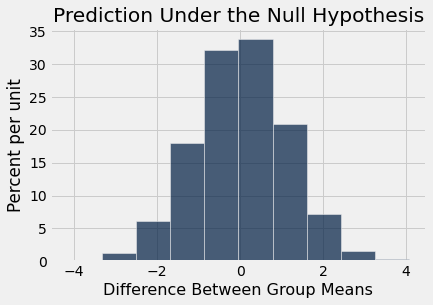

In [ ]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');

Notice how the distribution is centered roughly around 0. This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.

The observed difference in the original sample is about $-9.27$ ounces, which doesn't even appear on the horizontal scale of the histogram. The observed value of the statistic and the predicted behavior of the statistic under the null hypothesis are inconsistent. 

The conclusion of the test is that the data favor the alternative over the null. It supports the hypothesis that the average birth weight of babies born to mothers who smoke is less than the average birth weight of babies born to non-smokers.

If you want to compute an empirical p-value, remember that low values of the statistic favor the alternative hypothesis. 

In [ ]:
empirical_p = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_p

0.0

The empirical p-value is 0, meaning that none of the 5,000 permuted samples resulted in a difference of -9.27 or lower. This is only an approximation. The exact chance of getting a difference in that range is not 0. But it is vanishingly small, according to our simulation, and therefore we can reject the null hypothesis.

###12.1.7. Another Permutation Test
We can use the same method to compare other attributes of the smokers and the non-smokers, such as their ages. Histograms of the ages of the two groups show that in the sample, the mothers who smoked tended to be younger. 

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:483: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to

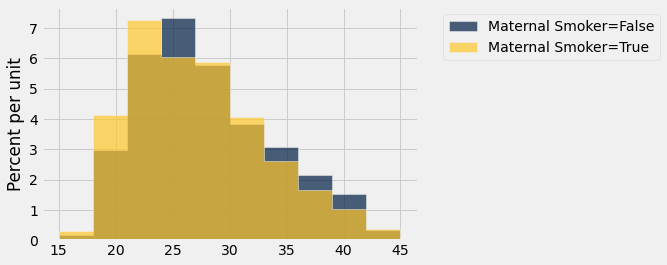

In [ ]:
smoking_and_age = births.select('Maternal Smoker', 'Maternal Age')
smoking_and_age.hist('Maternal Age', group = 'Maternal Smoker')

The observed difference between the average ages is about $-0.8$ years.

Let's rewrite the code that compared the birth weights so that it now compares the ages of the smokers and non-smokers.

In [ ]:
def difference_of_means(table, group_label):
    """Takes: name of table,
    column label that indicates the group to which the row belongs
    Returns: Difference of mean ages of the two groups"""
    reduced = table.select('Maternal Age', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [ ]:
observed_age_difference = difference_of_means(births, 'Maternal Smoker')
observed_age_difference

-0.8076725017901509

Remember that the difference is calculated as the mean age of the smokers minus the mean age of the non-smokers. The negative sign shows that the smokers are younger on average.

Is this difference due to chance, or does it reflect an underlying difference in the population?

As before, we can use a permutation test to answer this question. If the underlying distributions of ages in the two groups are the same, then the empirical distribution of the difference based on permuted samples will predict how the statistic should vary due to chance.

We will follow the same process as in any simulation. We will start by writing a function that returns one simulated value of the difference between means, and then write a `for` loop to simulate numerous such values and collect them in an array.

In [ ]:
def one_simulated_difference_of_means():
    """Returns: Difference between mean ages
    of smokers and non-smokers after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = births.sample(with_replacement=False).column('Maternal Smoker')
    
    # table of ages and shuffled labels
    shuffled_table = births.select('Maternal Age').with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, 'Shuffled Label')   

In [ ]:
age_differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    age_differences = np.append(age_differences, new_difference)

The observed difference is in the tail of the empirical distribution of the differences simulated under the null hypothesis. 

AttributeError: ignored

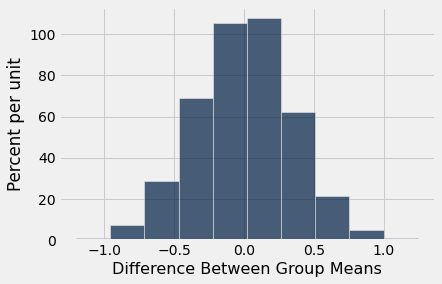

In [ ]:
Table().with_column(
    'Difference Between Group Means', age_differences).hist(
    right_end = observed_age_difference)
# Plotting parameters; you can ignore the code below
plots.ylim(-0.1, 1.2)
plots.scatter(observed_age_difference, 0, color='red', s=40, zorder=3)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', observed_age_difference)

Once again, the empirical distribution of the simulated differences is centered roughly around 0, because the simulation is under the null hypothesis that there is no difference between the distributions of the two groups.

The empirical p-value of the test is the proportion of simulated differences that were equal to or less than the observed difference. This is because low values of the difference favor the alternative hypothesis that the smokers were younger on average.

In [ ]:
empirical_p = np.count_nonzero(age_differences <= observed_age_difference) / 5000
empirical_p

0.0112

The empirical p-value is around 1% and therefore the result is statistically significant. The test supports the hypothesis that the smokers were younger on average.

##12.2. Causality

Our methods for comparing two samples have a powerful use in the analysis of randomized controlled experiments. Since the treatment and control groups are assigned randomly in such experiements, differences in their outcomes can be compared to what would happen just due to chance if the treatment had no effect at all. If the observed differences are more marked than what we would predict as purely due to chance, we will have evidence of *causation*. Because of the unbiased assignment of individuals to the treatment and control groups, differences in the outcomes of the two groups can be ascribed to the treatment.

The key to the analysis of randomized controlled experiments is understanding exactly how chance enters the picture. This helps us set up clear null and alternative hypotheses. Once that's done, we can simply use the methods of the previous sections to complete the analysis.

Let's see how to do this in an example.

## Treating Chronic Back Pain: A Randomized Controlled Trial
Low-back pain in adults can be very persistent and hard to treat. Common methods run the gamut from corticosteroids to acupuncture. A [randomized controlled trial (RCT)](https://www.ncbi.nlm.nih.gov/pubmed/11376175) examined the effect of using Botulinum Toxin A (BTA) as a treatment. Botulinum toxin is a neurotoxic protein that causes the disease botulism; [Wikipedia](https://en.wikipedia.org/wiki/Botulinum_toxin) says that botulinum "is the most acutely lethal toxin known." There are seven types of botulinum toxin. Botulinum Toxin A is one of the types that can cause disease in humans, but it is also used in medicine to treat various diseases involving the muscles. The RCT analyzed by Foster, Clapp, and Jabbari in 2001 examined it as a treatment for low back pain.

Thirty one patients with low-back pain were randomized into treatment and control groups, with 15 in the treatment group and 16 in control. The control group was given normal saline, and the trials were run double-blind so that neither doctors nor patients knew which group they were in.

Eight weeks after the start of the study, nine of the 15 in the treatment group and two of the 16 in the control group had pain relief (according to a precise definition used by the researchers). These data are in the table `bta` and appear to show that the treatment has a clear benefit.

In [ ]:
bta = Table.read_table(path_data + 'bta.csv')
bta.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


Let's see how many patients recovered in each group. Remember that counting is the same as adding zeros and ones. The sum of 1's in the control group is the number of control group patients who had pain relief. 

In [ ]:
bta.group('Group', sum)

Group,Result sum
Control,2
Treatment,9


Since counting is the same as the *sum* of zeros and ones, the *proportion* of patients who had pain relief is the *average* of zeros and ones. It is the sum divided by the total number of patients in each group.

In [ ]:
bta.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


In the treatment group, 60% of the patients had pain relief, compared to only 12.5% in the control group. None of the patients suffered any side effects. 

So the indications are that botulinum toxin A did better than the saline. But the conclusion isn't yet a slam-dunk. The patients were assigned at random into the two groups, so perhaps the difference could just be due to chance?

To understand what this means, we have to consider the possibility that among the 31 patients in the study, some were simply better able to recover than others, even without any help from the treatment. What if an unusually large proportion of such patients got assigned to the treatment group, just by chance? Then even if the treatment did nothing more than the saline in the control group, the results of the treatment group might look better than those of the control group. 

To account for this possibility, let's start by carefully setting up the chance model.

## Potential Outcomes
Before the patients are randomized into the two groups, our minds instinctively imagine two possible outcomes for each patient: the outcome that the patient would have if assigned to the treatment group, and the outcome that the same patient would have if assigned to the control group. These are called the two *potential outcomes* of the patient.

Thus there are 31 potential treatment outcomes and 31 potential control outcomes. The question is about the distributions of these two sets of 31 outcomes each. Are they the same, or are they different?

We can't answer this just yet, because we don't get to see all 31 values in each group. We just get to see a randomly selected 16 of the potential control outcomes, and the treatment outcomes of *the remaining* 15 patients. 

Here is a good way to visualize the setting. Each patient has a two-sided ticket:

![Two-sided ticket](../../../images/causality1.png)

After the randomization, we get to see the right half of a randomly selected set of tickets, and the left half of the remaining group.

![Half-tickets](../../../images/causality2.png)

The table `observed_outcomes` collects the information about every patient's potential outcomes, leaving the unobserved half of each "ticket" blank.  (It's just another way of thinking about the `bta` table, carrying the same information.)

In [ ]:
observed_outcomes = Table.read_table(path_data + "observed_outcomes.csv")
observed_outcomes.show()

Group,Outcome if assigned treatment,Outcome if assigned control
Control,Unknown,1
Control,Unknown,1
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0


## The Hypotheses
The question is whether the treatment does anything. In terms of the table `observed_outcomes`, the question is whether the distribution of the 31 "treatment" values in Column 1  (including the unknown ones) is different from the distribution of the 31 "control" values in Column 2 (again including the unknown ones).

**Null Hypothesis:** The distribution of all 31 potential "treatment" outcomes is the same as that of all 31 potential "control" outcomes. Botulinum toxin A does nothing different from saline; the difference in the two samples is just due to chance.

**Alternative Hypothesis:** The distribution of 31 potential "treatment" outcomes is different from that of the 31 control outcomes. The treatment does something different from the control.

Notice that the alternative is not specifying that the treatment helps – just that it is different from the control. This is standard in medical studies because it doesn't pre-judge which way the result might go. But you are welcome to run a test for whether the treatment does better than the control. Just adjust your test statistic accordingly.

There are 31 observed outcomes jointly in the two groups. If the null hypothesis were true, it wouldn't matter which of those 31 outcomes were labeled "treatment" and which "control." Any random subset of 16 out of the 31 values could be called "control" and the remaining 15 "treatment".

We can simulate this. We can randomly permute the 31 values, split them into two groups of 16 and 15, and see how different the distributions in the two groups are. Since the data are zeros and ones, we can just see how different the two proportions are. 

That's exactly what we did for A/B testing in the previous section. Sample A is now the control group and Sample B the treatment group. We will carry out the test below showing the details of all the steps. You should confirm that they are the same as the steps carried out for A/B testing.

## The Test Statistic
If the two group proportions are very different from each other, we will lean towards the alternative hypothesis that the two underlying distributions are different. So our test statistic will be the distance between the two group proportions, that is, the absolute value of the difference between them.

Large values of the test statistic will favor the alternative hypothesis over the null.

Since the two group proportions were 0.6 and 0.125, the observed value of the test statistic is $\big{\vert} 0.6 - 0.125 \big{\vert} = 0.475$. 

In [ ]:
bta

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [ ]:
bta.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


In [ ]:
observed_proportions = bta.group('Group', np.average).column(1)
observed_distance = abs(observed_proportions.item(0) - observed_proportions.item(1))
observed_distance

0.475

As we have done before, we will define a function that takes the following two arguments:

- the name of the table of data
- the column label of the group labels

and returns the distance between the two group proportions.

In [ ]:
def distance(table, group_label):
    reduced = table.select('Result', group_label)
    proportions = reduced.group(group_label, np.average).column(1)
    return abs(proportions.item(1) - proportions.item(0))

In [ ]:
distance(bta, 'Group')

0.475

## Predicting the Statistic Under the Null Hypothesis
We can simulate results under the null hypothesis, to see how our test statistic should come out if the null hypothesis is true.

### Generating One Value of the Statistic
The simulation follows exactly the same process we used in the previous section. We start by randomly permuting the all group labels and then attaching the shuffled labels to the 0/1 results.

In [ ]:
shuffled_labels = bta.sample(with_replacement=False).column(0)

In [ ]:
bta_with_shuffled_labels = bta.with_column('Shuffled Label', shuffled_labels)
bta_with_shuffled_labels.show()

Group,Result,Shuffled Label
Control,1,Treatment
Control,1,Treatment
Control,0,Treatment
Control,0,Control
Control,0,Treatment
Control,0,Control
Control,0,Control
Control,0,Control
Control,0,Control
Control,0,Treatment


We can now find the distance between the two proportions after the group labels have been shuffled.

In [ ]:
distance(bta_with_shuffled_labels, 'Shuffled Label')

0.08750000000000002

This is quite different from the distance between the two original proportions.

In [ ]:
distance(bta_with_shuffled_labels, 'Group')

0.475

### Permutation Test
If we shuffled the labels again, how different would the new distance be? To answer this, we will define a function that simulates one simulated value of the distance under the hypothesis of random draws from the same underlying distribution. And then we will collect 20,000 such simulated values in an array.

You can see that we are doing exactly what we did in our previous examples of the permutation test. 

In [ ]:
bta

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [ ]:
def one_simulated_distance():
    shuffled_labels = bta.sample(with_replacement = False
                                                    ).column('Group')
    shuffled_table = bta.select('Result').with_column(
        'Shuffled Label', shuffled_labels)
    return distance(shuffled_table, 'Shuffled Label') 

In [ ]:
distances = make_array()

repetitions = 20000
for i in np.arange(repetitions):
    new_distance = one_simulated_distance()
    distances = np.append(distances, new_distance)

## Conclusion of the Test
The array `distances` contains 20,000 values of our test statistic simulated under the null hypothesis. Here is their empirical histogram along with the observed value of the statistic. To find the P-value of the test, remember that large values of the distance favor the alternative hypothesis. 

AttributeError: ignored

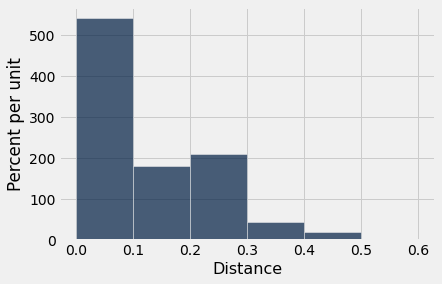

In [ ]:
Table().with_column('Distance', distances).hist(
    bins = np.arange(0, 0.7, 0.1), left_end = observed_distance)
# Plotting parameters; you can ignore the code below
plots.ylim(-0.1, 5.5)
plots.scatter(observed_distance, 0, color='red', s=40, zorder=3)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Distance', observed_distance)

To find the empirical p-value numerically, we must find the proportion of simulated statistics that were equal to or larger than the observed statistic.

In [ ]:
empirical_p = np.count_nonzero(distances >= observed_distance) / repetitions
empirical_p

0.0096

This is a small p-value. The observed statistic is in the tail of the empirical histogram of the test statistic generated under the null hypothesis.

The result is statistically significant. The test favors the alternative hypothesis over the null. The evidence supports the hypothesis that the treatment is doing something.

The study reports a P-value of 0.009, or 0.9%, which is not far from our empirical value. 

## Causality
Because the trials were randomized, the test is evidence that the treatment *causes* the difference. The random assignment of patients to the two groups ensures that there is no confounding variable that could affect the conclusion of causality.

If the treatment had not been randomly assigned, our test would still point toward an *association* between the treatment and back pain outcomes among our 31 patients.  But beware: without randomization, this association would not imply that the treatment caused a change in back pain outcomes.  For example, if the patients themselves had chosen whether to administer the treatment, perhaps the patients experiencing more pain would be more likely to choose the treatment *and* more likely to experience some reduction in pain even without medication.  Pre-existing pain would then be a *confounding factor* in the analysis.

## A Meta-Analysis

While the RCT does provide evidence that the botulinum toxin A treatment helped patients, a study of 31 patients isn't enough to establish the effectiveness of a medical treatment. This is not just because of the small sample size.  Our results in this section are valid for the 31 patients in the study, but we are really interested in the population of *all possible patients*.

In 2011, a group of researchers performed a [meta-analysis](https://www.ncbi.nlm.nih.gov/pubmed/21249702) of the studies on the treatment. That is, they identified all the available studies of such treatments for low-back pain and summarized the collated results. 

There were several studies but not many could be included in a scientifically sound manner: "We excluded evidence from nineteen studies due to non-randomisation, incomplete or unpublished data." Only three randomized controlled trials remained, one of which is the one we have studied in this section. The meta-analysis gave it the highest assessment among all the studies (LBP stands for low-back pain): "We identified three studies that investigated the merits of BoNT for LBP, but only one had a low risk of bias and evaluated patients with non-specific LBP (N = 31)." 

Putting it all together, the meta-analysis concluded, "There is low quality evidence that BoNT injections improved pain, function, or both better than saline injections and very low quality evidence that they were better than acupuncture or steroid injections. ...  Further research is very likely to have an important impact on the estimate of effect and our confidence in it. Future trials should standardize patient populations, treatment protocols and comparison groups, enlist more participants and include long-term outcomes, cost-benefit analysis and clinical relevance of findings."

It takes a lot of careful work to establish that a medical treatment has a beneficial effect. Knowing how to analyze randomized controlled trials is a crucial part of this work. Now that you know how to do that, you are well positioned to help medical and other professions establish cause-and-effect relations.

#12.3. Deflategate
On January 18, 2015, the Indianapolis Colts and the New England Patriots played the American Football Conference (AFC) championship game to determine which of those teams would play in the Super Bowl. After the game, there were allegations that the Patriots' footballs had not been inflated as much as the regulations required; they were softer. This could be an advantage, as softer balls might be easier to catch.

For several weeks, the world of American football was consumed by accusations, denials, theories, and suspicions: the press labeled the topic Deflategate, after the Watergate political scandal of the 1970's. The National Football League (NFL) commissioned an independent analysis. In this example, we will perform our own analysis of the data.

Pressure is often measured in pounds per square inch (psi). NFL rules stipulate that game balls must be inflated to have pressures in the range 12.5 psi and 13.5 psi. Each team plays with 12 balls. Teams have the responsibility of maintaining the pressure in their own footballs, but game officials inspect the balls. Before the start of the AFC game, all the Patriots' balls were at about 12.5 psi. Most of the Colts' balls were at about 13.0 psi. However, these pre-game data were not recorded.

During the second quarter, the Colts intercepted a Patriots ball. On the sidelines, they measured the pressure of the ball and determined that it was below the 12.5 psi threshold. Promptly, they informed officials. 

At half-time, all the game balls were collected for inspection. Two officials, Clete Blakeman and Dyrol Prioleau, measured the pressure in each of the balls. 

Here are the data. Each row corresponds to one football. Pressure is measured in psi. The Patriots ball that had been intercepted by the Colts was not inspected at half-time. Nor were most of the Colts' balls – the officials simply ran out of time and had to relinquish the balls for the start of second half play.

In [ ]:
football = Table.read_table(path_data + 'deflategate.csv')
football.show()

For each of the 15 balls that were inspected, the two officials got different results. It is not uncommon that repeated measurements on the same object yield different results, especially when the measurements are performed by different people. So we will assign to each the ball the average of the two measurements made on that ball.

In [ ]:
football = football.with_column(
    'Combined', (football.column(1)+football.column(2))/2
    ).drop(1, 2)
football.show()

At a glance, it seems apparent that the Patriots' footballs were at a lower pressure than the Colts' balls. Because some deflation is normal during the course of a game, the independent analysts decided to calculate the drop in pressure from the start of the game. Recall that the Patriots' balls had all started out at about 12.5 psi, and the Colts' balls at about 13.0 psi. Therefore the drop in pressure for the Patriots' balls was computed as 12.5 minus the pressure at half-time, and the drop in pressure for the Colts' balls was 13.0 minus the pressure at half-time.

We can calculate the drop in pressure for each football, by first setting up an array of the starting values. For this we will need an array consisting of 11 values each of which is 12.5, and another consisting of four values each of which is all 13. We will use the NumPy function `np.ones`, which takes a count as its argument and returns an array of that many elements, each of which is 1.

In [ ]:
np.ones(11)

In [ ]:
patriots_start = 12.5 * np.ones(11)
colts_start = 13 * np.ones(4)
start = np.append(patriots_start, colts_start)
start

The drop in pressure for each football is the difference between the starting pressure and the combined pressure measurement.

In [ ]:
drop = start - football.column('Combined')
football = football.with_column('Pressure Drop', drop)
football.show()

It looks as though the Patriots' drops were larger than the Colts'. Let's look at the average drop in each of the two groups. We no longer need the combined scores.

In [ ]:
football = football.drop('Combined')
football.group('Team', np.average)

The average drop for the Patriots was about 1.2 psi compared to about 0.47 psi for the Colts. 

The question now is why the Patriots' footballs had a larger drop in pressure, on average, than the Colts footballs. Could it be due to chance?

###12.2.1. The Hypotheses
How does chance come in here? Nothing was being selected at random. But we can make a chance model by hypothesizing that the 11 Patriots' drops look like a random sample of 11 out of all the 15 drops, with the Colts' drops being the remaining four. That's a completely specified chance model under which we can simulate data. So it's the **null hypothesis**.

For the alternative, we can take the position that the Patriots' drops are too large, on average, to resemble a random sample drawn from all the drops. 

### Test Statistic
A natural statistic is the difference between the two average drops, which we will compute as "average drop for Patriots - average drop for Colts". Large values of this statistic will favor the alternative hypothesis.

In [ ]:
observed_means = football.group('Team', np.average).column(1)

observed_difference = observed_means.item(1) - observed_means.item(0)
observed_difference

This positive difference reflects the fact that the average drop in pressure of the Patriots' footballs was greater than that of the Colts.

Just as we did in the previous section, we will write a function to calculate the difference between the mean drops in the two groups. The function `difference_of_means` takes two arguments:

- the name of the table of data
- the label of the column containing the two group labels

It returns the difference between the mean drops of the two groups. We will calculate the difference as the Patriots' drops minus the Colts' drops as before.

In [ ]:
def difference_of_means(table, group_label):
    reduced = table.select('Pressure Drop', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [ ]:
difference_of_means(football, 'Team')

This is the same as the value we found earlier as the `observed_difference`.

###12.2.2. Predicting the Statistic Under the Null Hypothesis
If the null hypothesis were true, then it shouldn't matter which footballs are labeled Patriots and which are labeled Colts. The distributions of the two sets of drops would be the same. We can simulate this by randomly shuffling the team labels.

In [ ]:
shuffled_labels = football.sample(with_replacement=False).column(0)
original_and_shuffled = football.with_column('Shuffled Label', shuffled_labels)
original_and_shuffled.show()

How do all the group averages compare?

In [ ]:
difference_of_means(original_and_shuffled, 'Shuffled Label')

In [ ]:
difference_of_means(original_and_shuffled, 'Team')

The two teams' average drop values are closer when the team labels are randomly assigned to the footballs than they were for the two groups actually used in the game.

###12.2.3. Permutation Test
It's time for a step that is now familiar. We will repeatedly simulate of the test statistic under the null hypothesis. 

by repeatedly permuting the footballs and assigning random sets to the two teams.

As usual, we  will start by writing a function `one_simulated_difference` that returns one simulated value of the difference between the mean pressure drops of the groups labeled Patriots and Colts after randomly permuting the team labels of the footballs.

In [ ]:
def one_simulated_difference():
    shuffled_labels = football.sample(with_replacement = False
                                                    ).column('Team')
    shuffled_table = football.select('Pressure Drop').with_column(
        'Shuffled Label', shuffled_labels)
    return difference_of_means(shuffled_table, 'Shuffled Label')   

We can now use a `for` loop and this function to create an array `differences` that contains 10,000 values of the test statistic simulated under the null hypothesis.

In [ ]:
differences = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference()
    differences = np.append(differences, new_difference)

###12.2.4. Conclusion of the Test
To calculate the empirical P-value, it's important to recall the alternative hypothesis, which is that the Patriots' drops are too large to be the result of chance variation alone.

Larger drops for the Patriots favor the alternative hypothesis. So the p-value is the chance (computed under the null hypothesis) of getting a test statistic equal to our observed value of 0.733522727272728 or larger.

The figure below visualizes this calculation. It consists of the empirical distribution of the test statistic under the null hypothesis, with the observed statistic marked in red on the horizontal axis and the area corresponding to the p-value shaded in gold.

In [ ]:
Table().with_column(
    'Difference Between Group Averages', differences).hist(
    left_end = observed_difference
)
plots.ylim(-0.1, 1.4)
plots.scatter(observed_difference, 0, color='red', s=30, zorder=3)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', observed_difference)

By eye, the p-value looks pretty small. We can confirm this by a calculation.

In [ ]:
empirical_p = np.count_nonzero(differences >= observed_difference) / 10000
empirical_p

As in previous examples of this test, the bulk of the distribution is centered around 0. Under the null hypothesis, the Patriots' drops are a random sample of all 15 drops, and therefore so are the Colts'. Therefore the two sets of drops should be about equal on average, and therefore their difference should be around 0.

But the observed value of the test statistic is quite far away from the heart of the distribution. By any reasonable cutoff for what is "small", the empirical P-value is small. So we end up rejecting the null hypothesis of randomness, and conclude that the Patriots drops were too large to reflect chance variation alone.

The independent investigative team analyzed the data in several different ways, taking into account the laws of physics. The final report said, 

> "[T]he average pressure drop of the Patriots game balls exceeded the average pressure drop of the Colts balls by 0.45 to 1.02 psi, depending on various possible assumptions regarding the gauges used, and assuming an initial pressure of 12.5 psi for the Patriots balls and 13.0 for the Colts balls."
> 
> -- *Investigative report commissioned by the NFL regarding the AFC Championship game on January 18, 2015*

Our analysis shows an average pressure drop of about 0.73 psi, which is close to the center of the interval "0.45 to 1.02 psi" and therefore consistent with the official analysis.

Remember that our test of hypotheses does not establish the reason *why* the difference is not due to chance. Establishing causality is usually more complex than running a test of hypotheses.

But the all-important question in the football world was about causation: the question was whether the excess drop of pressure in the Patriots' footballs was deliberate. If you are curious about the answer given by the investigators, here is the [full report](https://nfllabor.files.wordpress.com/2015/05/investigative-and-expert-reports-re-footballs-used-during-afc-championsh.pdf).